<a href="https://colab.research.google.com/github/florcisco/Sesgos-Cognitivos/blob/main/Sesgos_Cognitivos_AyV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoría *Sesgos Cognitivos en Razonamientos Lógicos*
# Práctico 1: Análisis y visualización

________________________________________________

En este práctico, nos adentramos en nuestros conjuntos de datos para:

- Identificar los tipos de variables que contienen.
- Calcular tendencias, dispersión y distribución de los datos.
- Analizar las relaciones entre las variables, utilizando gráficos que nos ayuden a visualizarlas. Prestaremos especial atención a:<br></br>
‣ La relación entre creencia y validez.<br>
‣ La relación entre respuestas correctas y modalidades de resolución.<br>

- Utilizaremos funciones de *Seaborn* y *Matplotlib* que nos permitirán realizar visualizaciones comparativas de manera efectiva.

----------------------------------

## 1. Conociendo nuestros *datasets*

In [170]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
from matplotlib.colors import LinearSegmentedColormap

In [171]:
# creamos nuestros data frames
df1 = pd.read_csv('https://raw.githubusercontent.com/florcisco/Sesgos-Cognitivos/refs/heads/main/dataset1_raw.csv') # primer estudio
df2 = pd.read_csv('https://raw.githubusercontent.com/florcisco/Sesgos-Cognitivos/refs/heads/main/dataset2_raw.csv') # segundo estudio

In [172]:
df1.head()

,num,Participante,Lugar_admin,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,1,1,Biología UNC 1°,Resolución Individual,18,M,,V,C,VC,1,1,1
1,2,1,Biología UNC 1°,Resolución Individual,18,M,,V,I,VI,2,1,1
2,3,1,Biología UNC 1°,Resolución Individual,18,M,,I,C,IC,3,0,1
3,4,1,Biología UNC 1°,Resolución Individual,18,M,,I,I,II,4,0,1
4,5,1,Biología UNC 1°,Resolución Individual,18,M,,V,C,VC,5,1,1


In [173]:
df2.head()

,num,Participante,Lugar_admin,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,1913,240,Lógica y Epistemología UCC 2°,Resolución Individual Pre,19,F,27,V,C,VC,1,1,1
1,1914,240,Lógica y Epistemología UCC 2°,Resolución Individual Pre,,,27,V,I,VI,2,0,0
2,1915,240,Lógica y Epistemología UCC 2°,Resolución Individual Pre,,,27,I,C,IC,3,0,1
3,1916,240,Lógica y Epistemología UCC 2°,Resolución Individual Pre,,,27,I,I,II,4,0,1
4,1917,240,Lógica y Epistemología UCC 2°,Resolución Individual Pre,,,27,V,C,VC,5,1,1


In [174]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   num               1912 non-null   int64 
 1   Participante      1912 non-null   int64 
 2   Lugar_admin       1912 non-null   object
 3   Modalidad         1912 non-null   object
 4   Edad              1912 non-null   object
 5   Género            1912 non-null   object
 6   Grupo             1912 non-null   object
 7   Validez           1912 non-null   object
 8   Creencia          1912 non-null   object
 9   ValidezxCreencia  1912 non-null   object
 10  Silogismo         1912 non-null   int64 
 11  Aceptación        1912 non-null   int64 
 12  Correctas         1912 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 194.3+ KB


In [175]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   num               2032 non-null   int64 
 1   Participante      2032 non-null   int64 
 2   Lugar_admin       2032 non-null   object
 3   Modalidad         2032 non-null   object
 4   Edad              2032 non-null   object
 5   Género            2032 non-null   object
 6   Grupo             2032 non-null   int64 
 7   Validez           2032 non-null   object
 8   Creencia          2032 non-null   object
 9   ValidezxCreencia  2032 non-null   object
 10  Silogismo         2032 non-null   int64 
 11  Aceptación        2032 non-null   int64 
 12  Correctas         2032 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 206.5+ KB


#### 1.1. ¿Cuántas columnas y filas contienen los diferentes conjuntos de datos?

In [176]:
print(df1.columns, df1.shape)
print(df2.columns, df2.shape)

Index(['num', 'Participante', 'Lugar_admin', 'Modalidad', 'Edad', 'Género',
       'Grupo', 'Validez', 'Creencia', 'ValidezxCreencia', 'Silogismo',
       'Aceptación', 'Correctas'],
      dtype='object') (1912, 13)
Index(['num', 'Participante', 'Lugar_admin', 'Modalidad', 'Edad', 'Género',
       'Grupo', 'Validez', 'Creencia', 'ValidezxCreencia', 'Silogismo',
       'Aceptación', 'Correctas'],
      dtype='object') (2032, 13)


<font color='#99b0fa'> Ambos conjuntos estan formados por las mismas columnas: 'num', 'Participante', 'Lugar_admin', 'Modalidad', 'Edad', 'Género', 'Grupo', 'Validez', 'Creencia', 'ValidezxCreencia', 'Silogismo', 'Aceptación' y 'Correctas'. En lo que no coinciden es su longitud, el primer conjunto contiene 1912 filas mientras que el segundo tiene 2032.

El siguiente paso es examinar las variables contenidas en nuestro dataset. Para esto, responderemos las siguientes preguntas:

#### 1.2. Para cada uno de nuestros conjuntos, ¿Cuántas y cuáles son las variables categóricas?¿Y las numéricas?¿Qué sucede con la columna `Edad`?

In [177]:
print(df1.dtypes)
print()
print(df2.dtypes)

num                  int64
Participante         int64
Lugar_admin         object
Modalidad           object
Edad                object
Género              object
Grupo               object
Validez             object
Creencia            object
ValidezxCreencia    object
Silogismo            int64
Aceptación           int64
Correctas            int64
dtype: object

num                  int64
Participante         int64
Lugar_admin         object
Modalidad           object
Edad                object
Género              object
Grupo                int64
Validez             object
Creencia            object
ValidezxCreencia    object
Silogismo            int64
Aceptación           int64
Correctas            int64
dtype: object



* <font color='#99b0fa'> Las columnas con tipos de datos categóricos son 7: "Lugar_admin", "Modalidad", "Edad", "Género", "Validez", "Creencia" y "ValidezxCreencia".
* Las columnas con tipos de datos numéricos son 6: "num", "Participante", "Grupo", "Silogismo", "Aceptación" y "Correctas".</font>

<font color='#99b0fa'> La "Edad" es una variable numérica, por lo que tendria que tener datos de tipo numéricos (int o float), pero se cargaron como datos categóricos (object).



#### 1.3. ¿Cuentan ambos *datasets* con las mismas columnas y valores para cada una de ellas?
**Ayuda**: observe el participante 1 y los participantes 100 en adelante del primer *dataset*

In [178]:
df1.columns==df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [179]:
df1.dtypes==df2.dtypes

,0
num,True
Participante,True
Lugar_admin,True
Modalidad,True
Edad,True
Género,True
Grupo,False
Validez,True
Creencia,True
ValidezxCreencia,True


In [180]:
print(df1.Grupo.unique(), df1.Grupo.dtype)

[' ' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26'] object


In [181]:
print(df2.Grupo.unique(), df2.Grupo.dtype)

[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50] int64


In [182]:
df1[100:]

,num,Participante,Lugar_admin,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
100,101,13,Biología UNC 1°,Resolución Individual,19,O,,V,C,VC,5,1,1
101,102,13,Biología UNC 1°,Resolución Individual,19,O,,V,I,VI,6,1,1
102,103,13,Biología UNC 1°,Resolución Individual,19,O,,I,C,IC,7,1,0
103,104,13,Biología UNC 1°,Resolución Individual,19,O,,I,I,II,8,1,0
104,105,14,Biología UNC 1°,Resolución Individual,36,F,,V,C,VC,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,1908,239,Criminología Siglo 21 1°,Resolución Grupal,,,26,I,I,II,4,0,1
1908,1909,239,Criminología Siglo 21 1°,Resolución Grupal,,,26,V,C,VC,5,1,1
1909,1910,239,Criminología Siglo 21 1°,Resolución Grupal,,,26,V,I,VI,6,0,0
1910,1911,239,Criminología Siglo 21 1°,Resolución Grupal,,,26,I,C,IC,7,1,0


In [183]:
df_pop1 = df1.copy()
df_pop1 = df_pop1[df_pop1["Grupo"] != ' ' ]
df_pop1.head()

,num,Participante,Lugar_admin,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
952,953,120,Técnicas Psicométricas UCC 3°,Resolución Grupal,20,F,1,V,C,VC,1,1,1
953,954,120,Técnicas Psicométricas UCC 3°,Resolución Grupal,,,1,V,I,VI,2,1,1
954,955,120,Técnicas Psicométricas UCC 3°,Resolución Grupal,,,1,I,C,IC,3,1,0
955,956,120,Técnicas Psicométricas UCC 3°,Resolución Grupal,,,1,I,I,II,4,1,0
956,957,120,Técnicas Psicométricas UCC 3°,Resolución Grupal,,,1,V,C,VC,5,1,1


In [184]:
df_pop1.tail()

,num,Participante,Lugar_admin,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
1907,1908,239,Criminología Siglo 21 1°,Resolución Grupal,,,26,I,I,II,4,0,1
1908,1909,239,Criminología Siglo 21 1°,Resolución Grupal,,,26,V,C,VC,5,1,1
1909,1910,239,Criminología Siglo 21 1°,Resolución Grupal,,,26,V,I,VI,6,0,0
1910,1911,239,Criminología Siglo 21 1°,Resolución Grupal,,,26,I,C,IC,7,1,0
1911,1912,239,Criminología Siglo 21 1°,Resolución Grupal,,,26,I,I,II,8,0,1


In [185]:
df_pop2 = df1.copy()
df_pop2 = df_pop2[df_pop2["Edad"] == ' ' ]
df_pop2[:25]

,num,Participante,Lugar_admin,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
40,41,6,Biología UNC 1°,Resolución Individual,,,,V,C,VC,1,1,1
41,42,6,Biología UNC 1°,Resolución Individual,,,,V,I,VI,2,1,1
42,43,6,Biología UNC 1°,Resolución Individual,,,,I,C,IC,3,1,0
43,44,6,Biología UNC 1°,Resolución Individual,,,,I,I,II,4,0,1
44,45,6,Biología UNC 1°,Resolución Individual,,,,V,C,VC,5,1,1
45,46,6,Biología UNC 1°,Resolución Individual,,,,V,I,VI,6,1,1
46,47,6,Biología UNC 1°,Resolución Individual,,,,I,C,IC,7,0,1
47,48,6,Biología UNC 1°,Resolución Individual,,,,I,I,II,8,0,1
280,281,36,Psicología Experimental UNC 3°,Resolución Individual,,,,V,C,VC,1,1,1
281,282,36,Psicología Experimental UNC 3°,Resolución Individual,,,,V,I,VI,2,0,0


<font color='#99b0fa'> Los datasets si tienen las mismas columnas, la única diferencia es que cambia el tipo de dato en la columna grupos, siendo en el primer dataset tipo categóricos y en la segunda son numéricos. Un detalle a tener en cuenta es que la descripción de los dataset se indica que esta columna solo tiene valores para el segundo dataset pero en realidad el primer dataset tiene valor en esta columna desde la fila 952. Además en las columnas Edad y Genero faltan datos de participantes especificos, como lo son el participante 6 y el 36.

#### 1.4. Comparando nuestros conjuntos de datos, ¿Qué observa con respecto a las columnas `Edad`, `Género`, `Grupo` y `Modalidad`?

In [186]:
print("EDAD")
print()
print(df1.Edad.describe())
print()
print(df2.Edad.describe())
print()
print(df1.Edad.unique(), df1.Edad.nunique(), df1.Edad.dtype)
print(df2.Edad.unique(), df2.Edad.nunique(), df2.Edad.dtype)

EDAD

count     1912
unique      28
top           
freq       997
Name: Edad, dtype: object

count     2032
unique      10
top           
freq      1917
Name: Edad, dtype: object

['18' '23' '20' '25' ' ' '24' '27' '19' '32' '22' '36' '47' '57' '26' '30'
 '35' '29' '21' '28' '51' '37' '58' '39' '52' '33' '45' '31' '41'] 28 object
['19' ' ' '21' '20' '31' '22' '54' '18' '23' '29'] 10 object


In [187]:
print("GÉNERO")
print()
print(df1.Género.describe())
print()
print(df2.Género.describe())
print()
print(df1.Género.unique(), df1.Género.nunique(), df1.Género.dtype)
print(df2.Género.unique(), df2.Género.nunique(), df2.Género.dtype)

GÉNERO

count     1912
unique       4
top           
freq       996
Name: Género, dtype: object

count     2032
unique       4
top           
freq      1917
Name: Género, dtype: object

['M' 'F' ' ' 'O'] 4 object
['F' ' ' 'M' 'O'] 4 object


In [188]:
print("GRUPO")
print()
print(df1.Grupo.describe())
print()
print(df2.Grupo.describe())
print()
print(df1.Grupo.unique(), df1.Grupo.nunique(), df1.Grupo.dtype)
print(df2.Grupo.unique(), df2.Grupo.nunique(), df2.Grupo.dtype)

GRUPO

count     1912
unique      27
top           
freq       952
Name: Grupo, dtype: object

count    2032.000000
mean       38.244094
std         6.847244
min        27.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        50.000000
Name: Grupo, dtype: float64

[' ' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26'] 27 object
[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50] 24 int64


In [189]:
print("MODALIDAD")
print()
print(df1.Modalidad.describe())
print()
print(df2.Modalidad.describe())
print()
print(df1.Modalidad.unique(), df1.Modalidad.nunique(), df1.Modalidad.dtype)
print(df2.Modalidad.unique(), df2.Modalidad.nunique(), df2.Modalidad.dtype)


MODALIDAD

count                  1912
unique                    2
top       Resolución Grupal
freq                    960
Name: Modalidad, dtype: object

count                          2032
unique                            3
top       Resolución Individual Pre
freq                            920
Name: Modalidad, dtype: object

['Resolución Individual' 'Resolución Grupal'] 2 object
['Resolución Individual Pre' 'Resolución Individual Post'
 'Resolución Grupal'] 3 object


* <font color='#99b0fa'>  Edad: de esta columna se puede destacar que para el primer conjunto se tiene una variabilidad mucho mayor de datos, casi el triple de valores únicos que en el segundo conjunto. En otras palabras, el rango de edad de las muestras es mayor en el primer conjunto, de 18 a 58 años, mientras que en el segundo el rango es entre 18 y 31 años. Además como se venía viendo existen muchas filas sin información en esta, particularmente para el primer conjunto 997 y para el segundo 1917.
*   Género: esta columna contiene los mismos datos en ambos conjuntos, destacando que en los dos se tienen ejemplos sin completar de forma similar a Edad, son 996 en el primer conjunto y 1917 en el segundo.</font>
<font color='#99b0fa'>
*   Grupo: como se veía en el punto anterior, esta columna tiene diferentes tipos de datos, siendo para el primer conjunto categóricos y para el segundo numéricos. Además, viendo los datos, el primer conjunto comienza a contabilizar los grupos del 1 al 26 y el segundo continúa el conteo del 27 al 50. Y para el primer conjunto hay 952 filas sin valor en esta columna.</font>
<font color='#99b0fa'>
*   Modalidad: como se explica en las especificaciones, esta columna tiene dos tipos para el primer dataset, grupal o individual, mientras que para el segundo se divide el individual en pre y post, por lo que tiene tres valores posibles. Cabe destacar que esta columna no tiene filas vacias.</font>




#### 1.5. ¿Cuántos participantes hubo?¿Cuántos grupos se conformaron?

In [190]:
print("Cantidad de participantes en el primer conjunto:", df1.Participante.nunique())
print("Cantidad de participantes en el segundo conjunto:", df2.Participante.nunique())
print("Participantes totales:", df2.Participante.max())
print("Cantidad de grupos:",  df2.Grupo.max())

Cantidad de participantes en el primer conjunto: 239
Cantidad de participantes en el segundo conjunto: 115
Participantes totales: 354
Cantidad de grupos: 50


<font color='#99b0fa'>  Entre los dos conjuntos se tiene un total de 354 participantes, 239 en el primero y 115 en el segundo. Y se armaron 50 grupos.



In [191]:
np.linspace(240, 354, 115, dtype= "int")==df2.Participante.unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [192]:
np.linspace(27, 50, 24, dtype= "int")==df2.Grupo.unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [193]:
#Corregido, de todas formas dice que no se puede usar el .max porque estas asumiendo que se empieza en 1 y tenes todos los valores hasta el max,
#el tema es que no asumi nada eso esta printeado en el punto anterior.
print("Cantidad de participantes en el primer conjunto:", df1.Participante.nunique())
print("Cantidad de participantes en el segundo conjunto:", df2.Participante.nunique())
print("Participantes totales:", (df1.Participante.nunique()+df2.Participante.nunique()))
print("Cantidad de grupos en el primer conjunto:",  (df1.Grupo.nunique()-1))#le resto uno porque la funcion cuenta como un grupo a la celda vacía
print("Cantidad de grupos en el segundo conjunto:", df2.Grupo.nunique())
print("Cantidad de grupos totales:", ((df1.Grupo.nunique()-1)+df2.Grupo.nunique()))

Cantidad de participantes en el primer conjunto: 239
Cantidad de participantes en el segundo conjunto: 115
Participantes totales: 354
Cantidad de grupos en el primer conjunto: 26
Cantidad de grupos en el segundo conjunto: 24
Cantidad de grupos totales: 50



#### 1.6. Si nos enfocamos ahora en nuestro segundo conjunto de datos y las columnas `Participante`, `Modalidad` y `Grupo`, ¿Es posible afirmar contamos con las 24 evaluaciones de argumentos para cada Participante?¿Por qué?

In [194]:
print(len(df2))
print("Participante")
print(df2.Participante.unique(), df2.Participante.nunique(), df2.Participante.dtype, len(df2.Participante) )
print("Cantidad promedio de observaciones por participante:",len(df2.Participante)/df2.Participante.nunique() )
print("Grupo")
print(df2.Grupo.unique(), df2.Grupo.nunique(), df2.Grupo.dtype)
print("Modalidad")
print(df2.Modalidad.unique(), df2.Modalidad.nunique(), df2.Modalidad.dtype)

2032
Participante
[240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354] 115 int64 2032
Cantidad promedio de observaciones por participante: 17.669565217391305
Grupo
[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50] 24 int64
Modalidad
['Resolución Individual Pre' 'Resolución Individual Post'
 'Resolución Grupal'] 3 object


<font color='#99b0fa'> Solamente dividiendo la cantidad de observaciones por la cantidad de participantes se puede notar que no se tienen 24 observaciones por participante, el promedio está más cerca de 17.

In [195]:
print(df2['Participante'].value_counts().unique())
print(df2['Participante'].value_counts().describe())


[24 16]
count    115.000000
mean      17.669565
std        3.265239
min       16.000000
25%       16.000000
50%       16.000000
75%       16.000000
max       24.000000
Name: count, dtype: float64


<font color='#99b0fa'> Viendo la distribución de las cantidades se puede verificar que por lo menos el 75% de los participantes tiene solo 16 evaluaciones.

In [196]:
df1.head()

,num,Participante,Lugar_admin,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,1,1,Biología UNC 1°,Resolución Individual,18,M,,V,C,VC,1,1,1
1,2,1,Biología UNC 1°,Resolución Individual,18,M,,V,I,VI,2,1,1
2,3,1,Biología UNC 1°,Resolución Individual,18,M,,I,C,IC,3,0,1
3,4,1,Biología UNC 1°,Resolución Individual,18,M,,I,I,II,4,0,1
4,5,1,Biología UNC 1°,Resolución Individual,18,M,,V,C,VC,5,1,1


In [197]:
df1.head()

,num,Participante,Lugar_admin,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,1,1,Biología UNC 1°,Resolución Individual,18,M,,V,C,VC,1,1,1
1,2,1,Biología UNC 1°,Resolución Individual,18,M,,V,I,VI,2,1,1
2,3,1,Biología UNC 1°,Resolución Individual,18,M,,I,C,IC,3,0,1
3,4,1,Biología UNC 1°,Resolución Individual,18,M,,I,I,II,4,0,1
4,5,1,Biología UNC 1°,Resolución Individual,18,M,,V,C,VC,5,1,1


In [198]:
import numpy as np
from google.colab import autoviz
#df_4610471462131065478 = autoviz.get_df('df_4610471462131065478')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df1, *['ValidezxCreencia'], **{})
chart

In [199]:
df2[:50]

,num,Participante,Lugar_admin,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,1913,240,Lógica y Epistemología UCC 2°,Resolución Individual Pre,19,F,27,V,C,VC,1,1,1
1,1914,240,Lógica y Epistemología UCC 2°,Resolución Individual Pre,,,27,V,I,VI,2,0,0
2,1915,240,Lógica y Epistemología UCC 2°,Resolución Individual Pre,,,27,I,C,IC,3,0,1
3,1916,240,Lógica y Epistemología UCC 2°,Resolución Individual Pre,,,27,I,I,II,4,0,1
4,1917,240,Lógica y Epistemología UCC 2°,Resolución Individual Pre,,,27,V,C,VC,5,1,1
5,1918,240,Lógica y Epistemología UCC 2°,Resolución Individual Pre,,,27,V,I,VI,6,0,0
6,1919,240,Lógica y Epistemología UCC 2°,Resolución Individual Pre,,,27,I,C,IC,7,1,0
7,1920,240,Lógica y Epistemología UCC 2°,Resolución Individual Pre,,,27,I,I,II,8,0,1
8,1921,240,Lógica y Epistemología UCC 2°,Resolución Individual Post,,,27,V,C,VC,1,1,1
9,1922,240,Lógica y Epistemología UCC 2°,Resolución Individual Post,,,27,V,I,VI,2,1,1


In [200]:
df2.Participante.nunique()*8

920

In [201]:
print(df2['Modalidad'].value_counts())

Modalidad
Resolución Individual Pre     920
Resolución Individual Post    920
Resolución Grupal             192
Name: count, dtype: int64


<font color='#99b0fa'> Viendo las primeras 50 filas, el total de participantes y la cantidad de respuestas para cada modalidad se puede concluir que para las modalidades individuales se tienen 8 respuestas por participante por modalidad. Esto genera que todos los participantes tengan por lo menos 16 evaluaciones

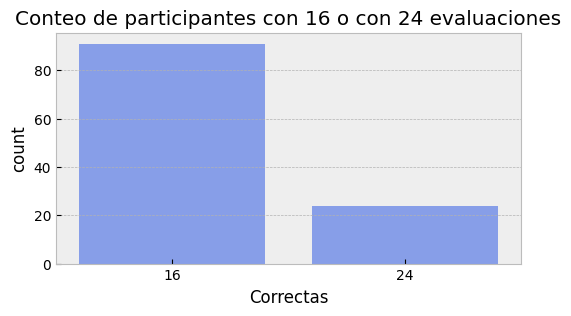

Correctas
16    91
24    24
Name: count, dtype: int64


In [202]:
plt.style.use('bmh')
fig = plt.figure(figsize=(6,3))
sns.countplot(x=df2.groupby("Participante").count()["Correctas"], color='#7795f8')
plt.title("Conteo de participantes con 16 o con 24 evaluaciones")
plt.show()
print(df2.groupby("Participante").count()["Correctas"].value_counts())

In [203]:
df_pop4 = df2.copy()
df_pop4 = df_pop4[df_pop4["Modalidad"] == 'Resolución Grupal' ]
df_pop4[:25]

,num,Participante,Lugar_admin,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
80,1993,244,Lógica y Epistemología UCC 2°,Resolución Grupal,,,27,V,C,VC,1,1,1
81,1994,244,Lógica y Epistemología UCC 2°,Resolución Grupal,,,27,V,I,VI,2,1,1
82,1995,244,Lógica y Epistemología UCC 2°,Resolución Grupal,,,27,I,C,IC,3,0,1
83,1996,244,Lógica y Epistemología UCC 2°,Resolución Grupal,,,27,I,I,II,4,0,1
84,1997,244,Lógica y Epistemología UCC 2°,Resolución Grupal,,,27,V,C,VC,5,1,1
85,1998,244,Lógica y Epistemología UCC 2°,Resolución Grupal,,,27,V,I,VI,6,1,1
86,1999,244,Lógica y Epistemología UCC 2°,Resolución Grupal,,,27,I,C,IC,7,0,1
87,2000,244,Lógica y Epistemología UCC 2°,Resolución Grupal,,,27,I,I,II,8,0,1
168,2081,249,Lógica y Epistemología UCC 2°,Resolución Grupal,,,28,V,C,VC,1,1,1
169,2082,249,Lógica y Epistemología UCC 2°,Resolución Grupal,,,28,V,I,VI,2,1,1


<font color='#99b0fa'> Por otro lado separando solo las filas de modalidad Grupal se puede ver cómo para algunos participantes se agregan 8 evaluaciones más, pero no para todos, por ejemplo no están los participantes 240, 241, 242, 243, 245, 246, 247 y 248. Se puede deducir por las 192 repeticiones de Resolución Grupal que solo 24 de los 115 participantes realizaron la modalidad grupal y tienen las 24 evaluaciones totales.

In [204]:
print((df_pop4.Grupo.value_counts()==8))# Para ver si todos los grupos efectivamente tienen las 8 evaluaciones que les corresponden
print(((df_pop4.Grupo.value_counts()==8).count())== df2.Grupo.nunique())# Para verificar que sean los 24 grupos presente en el segundo dataset

Grupo
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
Name: count, dtype: bool
True


In [205]:
#Corrección
df_pop2 = df2.copy()
df_pop2 = df_pop2[df_pop2["Grupo"] != " "]
df_pop2.Participante.unique()==df2.Participante.unique()
#Como en la tabla que contempla unicamente las filas que si tiene un valor de grupo se tiene a los mismos participantes que en la tabla original se puede inferir
#que por lo menos en una fila para cada participante se da a conocer a que grupo pertenece, entonces se pueden inferir sus respuestas grupales.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

## 2. Analizando nuestros datos

Los experimentos a partir de los cuales se recopilaron nuestros datos, fueron diseñados con los objetivos de identificar la presencia de sesgos de creencia en pruebas de razonamiento, analizar los efectos del contenido fáctico (acerca del mundo) en dichos razonamientos así como, evaluar la incidencia de diferentes modalidades (grupal o individual) en la aparición o mitigación de los sesgos.

Consideramos que las variables correspondientes a las columnas `num` y `Lugar_admin` no son relevantes para las preguntas que se desea responder. Sin embargo, cabe preguntarse, acerca de la relevancia del resto de las variables.

In [206]:
df_1=df1.copy().drop(["num", "Lugar_admin"], axis=1)
df_2=df2.copy().drop(["num", "Lugar_admin"], axis=1)

In [207]:
df_1.head()

,Participante,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,1,Resolución Individual,18,M,,V,C,VC,1,1,1
1,1,Resolución Individual,18,M,,V,I,VI,2,1,1
2,1,Resolución Individual,18,M,,I,C,IC,3,0,1
3,1,Resolución Individual,18,M,,I,I,II,4,0,1
4,1,Resolución Individual,18,M,,V,C,VC,5,1,1


In [208]:
df_2.head()

,Participante,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,240,Resolución Individual Pre,19,F,27,V,C,VC,1,1,1
1,240,Resolución Individual Pre,,,27,V,I,VI,2,0,0
2,240,Resolución Individual Pre,,,27,I,C,IC,3,0,1
3,240,Resolución Individual Pre,,,27,I,I,II,4,0,1
4,240,Resolución Individual Pre,,,27,V,C,VC,5,1,1


#### 2.1. ¿Qué puede decir acerca de la edad de los participantes? ¿Y del género?¿Considera que estas variables pueden tener alguna relevancia para nuestro estudio?¿Por qué?

In [209]:
df_1=df_1.sort_values('Edad')
df_2=df_2.sort_values('Edad')

Text(0.5, 1.0, 'Conteo de las edades de los participantes')

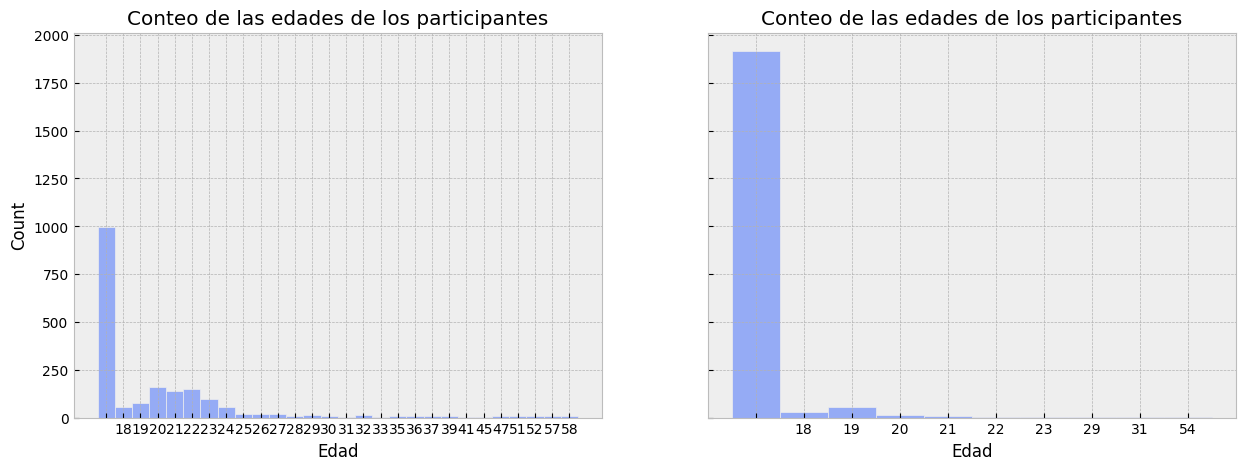

In [210]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
sns.histplot(df_1['Edad'], ax=ax1, color="#7795f8")
sns.histplot(df_2['Edad'], ax=ax2, color="#7795f8")
ax1.set_title("Conteo de las edades de los participantes")
ax2.set_title("Conteo de las edades de los participantes")

<Axes: title={'center': 'Frecuencia de Correctas para cada edad del primer conjunto, sin celdas vacías'}, xlabel='Frecuencia', ylabel='Edad'>

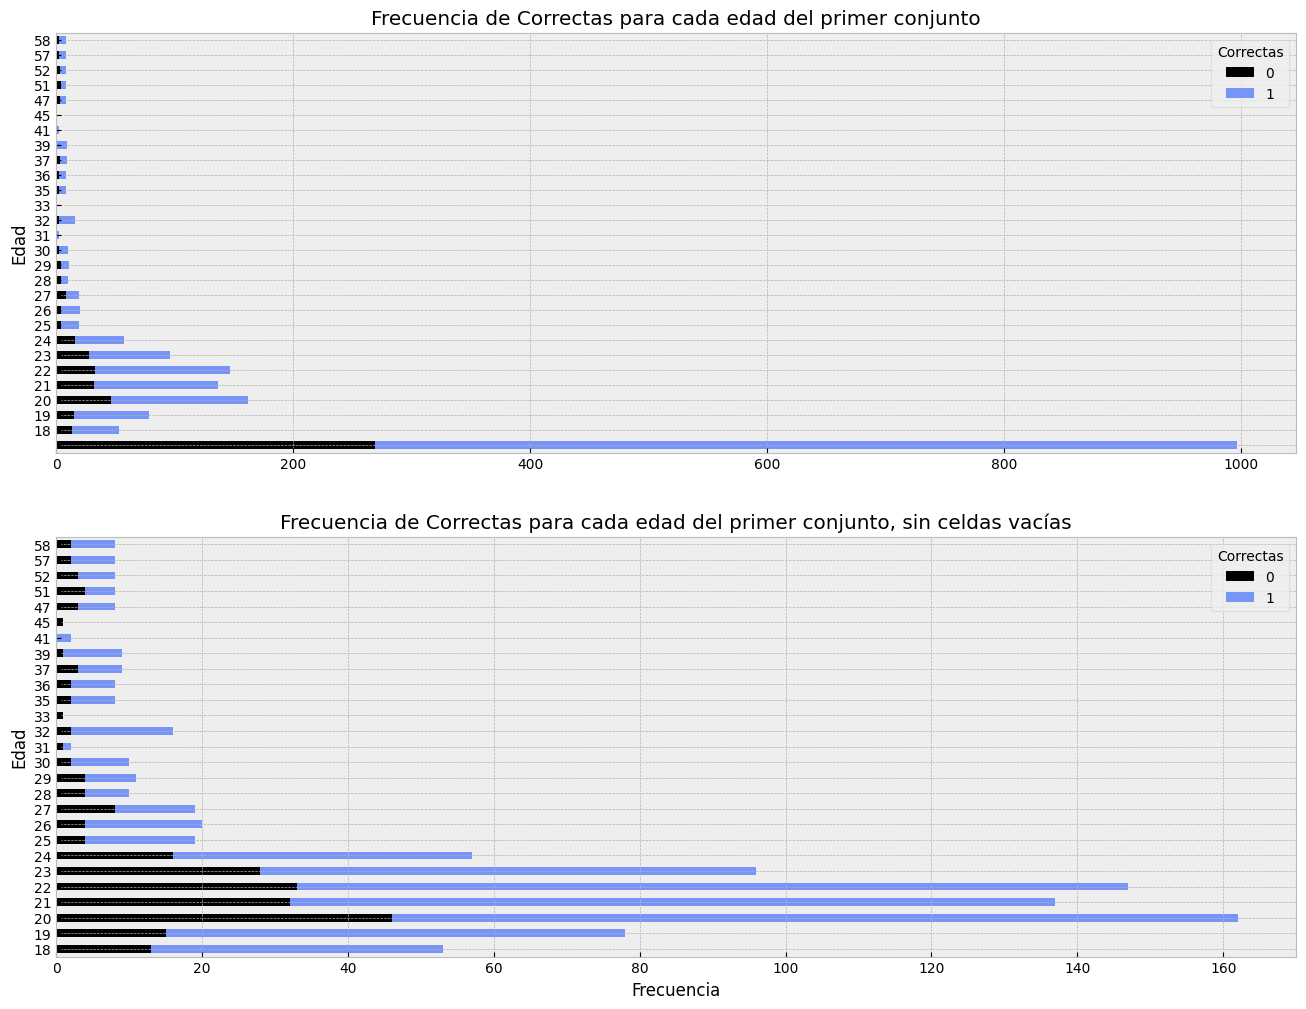

In [211]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))
new_cmap = LinearSegmentedColormap.from_list("Lilas", ['black', "#7795f8"])
a=df_1.groupby(['Correctas','Edad']).size()
a=a.reset_index()
a= pd.pivot_table(a, columns = 'Correctas', index = 'Edad', values = 0)
a.plot(kind = 'barh', stacked = True, ax=ax1, colormap= new_cmap,  title="Frecuencia de Correctas para cada edad del primer conjunto")

df_1p = df_1.copy()
df_1p = df_1p[df_1p["Edad"] != " "]
b=df_1p.groupby(['Correctas','Edad']).size()
b=b.reset_index()
b= pd.pivot_table(b, columns = 'Correctas', index = 'Edad', values = 0)
b.plot(kind = 'barh', stacked = True, ax=ax2, colormap= new_cmap, title="Frecuencia de Correctas para cada edad del primer conjunto, sin celdas vacías", xlim=(0, 170), xlabel="Frecuencia")

<Axes: title={'center': 'Frecuencia de Correctas para cada edad, sin celdas vacías'}, xlabel='Frecuencia', ylabel='Edad'>

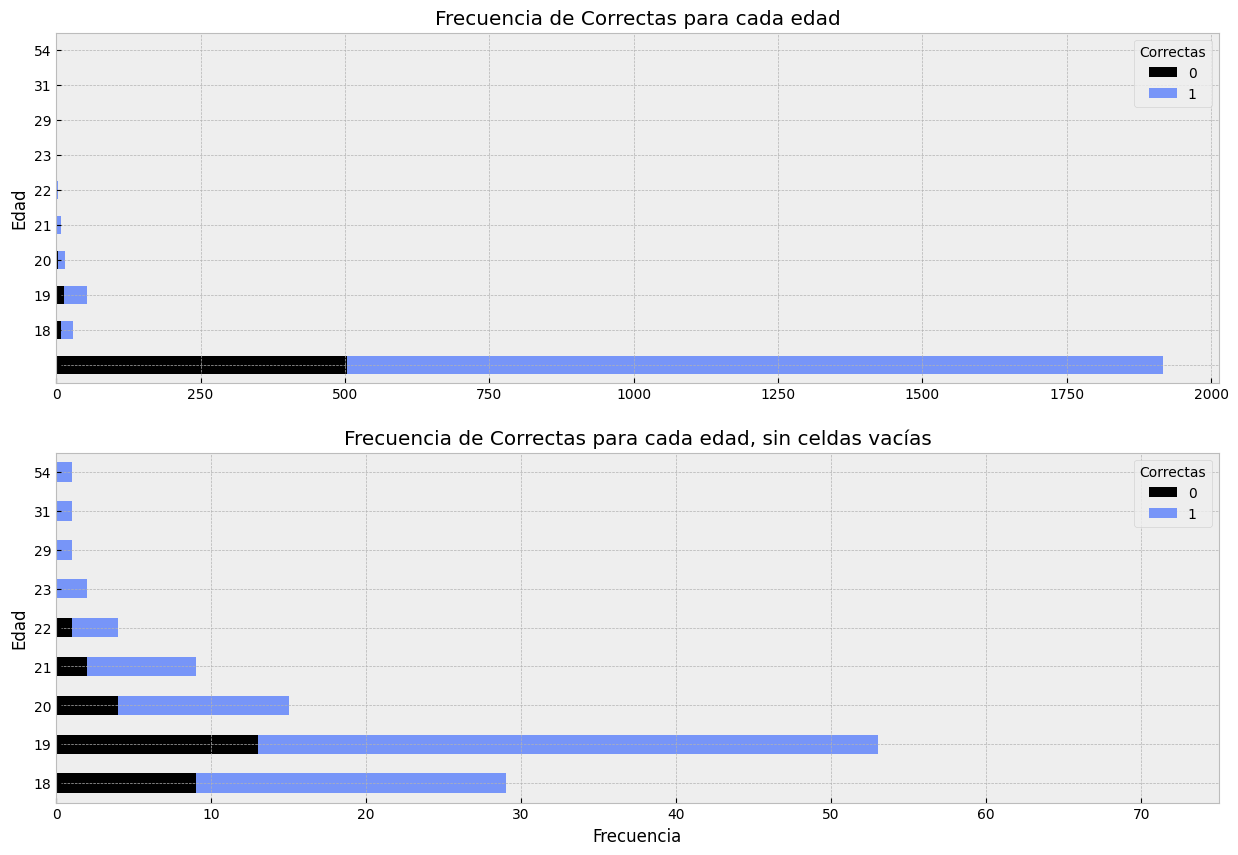

In [212]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
a=df_2.groupby(['Correctas','Edad']).size()
a=a.reset_index()
a= pd.pivot_table(a, columns = 'Correctas', index = 'Edad', values = 0)
a.plot(kind = 'barh', stacked = True, ax=ax1, colormap= new_cmap, title="Frecuencia de Correctas para cada edad")

df_2p = df_2.copy()
df_2p = df_2p[df_2p["Edad"] != " "]
b=df_2p.groupby(['Correctas','Edad']).size()
b=b.reset_index()
b= pd.pivot_table(b, columns = 'Correctas', index = 'Edad', values = 0)
b.plot(kind = 'barh', stacked = True, ax=ax2, colormap= new_cmap, title="Frecuencia de Correctas para cada edad, sin celdas vacías", xlim=(0, 75), xlabel="Frecuencia")

<font color='#99b0fa'> En un primer análisis pareciera que no hay ninguna tendencia por edad, particularmente porque la mayoría de las observaciones no tienen especificada esta columna (aunque como se veía antes hay varios de esos valores vacíos que se pueden inferir y completar por ser de un mismo participante).

Text(0.5, 1.0, 'Conteo de los géneros de los participantes')

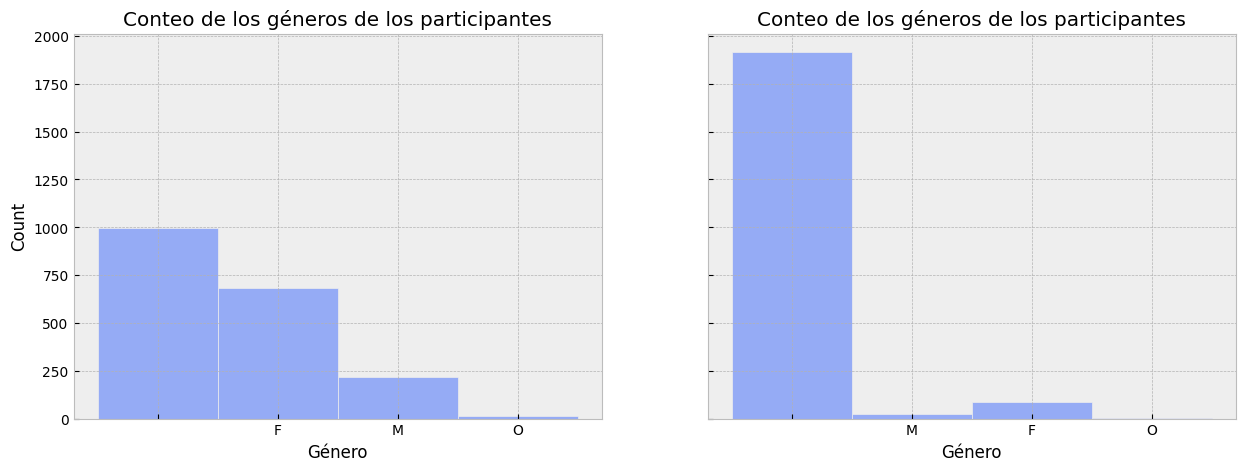

In [213]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
sns.histplot(df_1['Género'], ax=ax1, color="#7795f8")
sns.histplot(df_2['Género'], ax=ax2, color="#7795f8")
ax1.set_title("Conteo de los géneros de los participantes")
ax2.set_title("Conteo de los géneros de los participantes")

In [214]:
df_1.groupby('Género')['Correctas'].describe().transpose()

Género,,F,M,O
count,996.000000,682.000000,218.000000,16.000000
mean,0.729920,0.746334,0.724771,0.812500
std,0.444224,0.435428,0.447658,0.403113
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Correctas', ylabel='Género'>

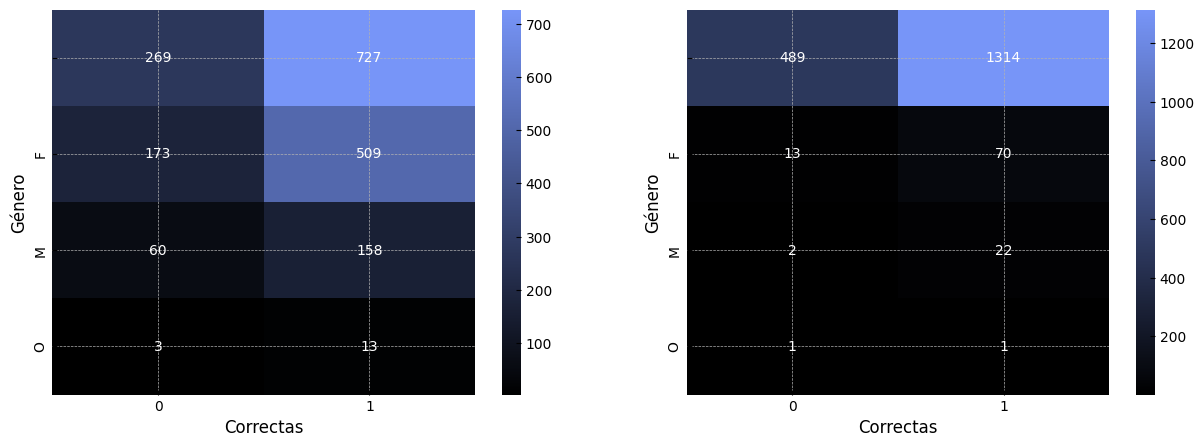

In [215]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
exp1 = pd.crosstab(df_1.Género, df_1.Correctas)
sns.heatmap(exp1, annot=True, fmt='g', ax=ax1, cmap=new_cmap)
exp2 = pd.crosstab(df_2.Género, df_1.Correctas)
sns.heatmap(exp2, annot=True, fmt='g', ax=ax2, linecolor='black', cmap=new_cmap,)

<font color='#99b0fa'> De forma similar que con "Edad", en un primer análisis pareciera que no hay ninguna tendencia por género, particularmente porque la mayoría de las observaciones no tienen especificada esta columna (especialmente en el segundo conjunto de datos).

#### 2.2. Distribución de valores y comportamiento de los datos

En este práctico tomaremos las variables de las columnas `Aceptación` y `Correctas` como variables categóricas (**1** = acepta, **0** = no acepta y **1** = correcta, **0** = incorrecta, respectivamente)

In [216]:
dfc_1=df_1.copy()
dfc_1['Aceptación'] = dfc_1['Aceptación'].astype('object')
dfc_1['Correctas'] = dfc_1['Correctas'].astype('object')
dfc_2=df_2.copy()
dfc_2['Aceptación'] = dfc_2['Aceptación'].astype('object')
dfc_2['Correctas'] = dfc_2['Correctas'].astype('object')
print(df_1.dtypes)
print(dfc_1.dtypes)

Participante         int64
Modalidad           object
Edad                object
Género              object
Grupo               object
Validez             object
Creencia            object
ValidezxCreencia    object
Silogismo            int64
Aceptación           int64
Correctas            int64
dtype: object
Participante         int64
Modalidad           object
Edad                object
Género              object
Grupo               object
Validez             object
Creencia            object
ValidezxCreencia    object
Silogismo            int64
Aceptación          object
Correctas           object
dtype: object


In [217]:
dfc_1.head()

,Participante,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
955,120,Resolución Grupal,,,1,I,I,II,4,1,0
1238,155,Resolución Grupal,,,8,I,C,IC,7,1,0
1237,155,Resolución Grupal,,,8,V,I,VI,6,1,1
1236,155,Resolución Grupal,,,8,V,C,VC,5,1,1
1235,155,Resolución Grupal,,,8,I,I,II,4,0,1


In [218]:
dfc_2.head()

,Participante,Modalidad,Edad,Género,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
1015,297,Resolución Individual Post,,,38,I,I,II,8,1,0
1343,316,Resolución Individual Pre,,,42,I,I,II,8,0,1
1342,316,Resolución Individual Pre,,,42,I,C,IC,7,0,1
1341,316,Resolución Individual Pre,,,42,V,I,VI,6,0,0
1340,316,Resolución Individual Pre,,,42,V,C,VC,5,1,1


##### 2.2.1. Elaborar, para cada uno de los *datasets*, una tabla con conteo de frecuencia de:
**(a)** argumentos aceptados según su validez

**(b)** argumentos aceptados según su creencia

**(c)** argumentos aceptado según su validez y creencia

**(d)** respuestas correctas según modalidad de resolución


In [219]:
print("(a)")
print("Argumentos aceptados según su validez en el primer conjuntos:")
print()
print(pd.crosstab(dfc_1.Validez,dfc_1.Aceptación))
print()
print("Argumentos aceptados según su validez en el segundo conjuntos:")
print()
print(pd.crosstab(dfc_2.Validez,dfc_2.Aceptación))

(a)
Argumentos aceptados según su validez en el primer conjuntos:

Aceptación    0    1
Validez             
I           691  265
V           240  716

Argumentos aceptados según su validez en el segundo conjuntos:

Aceptación    0    1
Validez             
I           662  354
V           178  838


In [220]:
print("(b)")
print("Argumentos aceptados según su creencia en el primer conjuntos:")
print()
print(pd.crosstab(dfc_1.Creencia,dfc_1.Aceptación))
print()
print("Argumentos aceptados según su creencia en el segundo conjuntos:")
print()
print(pd.crosstab(dfc_2.Creencia,dfc_2.Aceptación))

(b)
Argumentos aceptados según su creencia en el primer conjuntos:

Aceptación    0    1
Creencia            
C           315  641
I           616  340

Argumentos aceptados según su creencia en el segundo conjuntos:

Aceptación    0    1
Creencia            
C           293  723
I           547  469


In [221]:
print("(c)")
print("Argumentos aceptados según su validez y creencia en el primer conjuntos:")
print()
print(pd.crosstab(dfc_1.ValidezxCreencia,dfc_1.Aceptación))
print()
print("Argumentos aceptados según su validez y creencia en el segundo conjuntos:")
print()
print(pd.crosstab(dfc_2.ValidezxCreencia,dfc_2.Aceptación))

(c)
Argumentos aceptados según su validez y creencia en el primer conjuntos:

Aceptación          0    1
ValidezxCreencia          
IC                264  214
II                427   51
VC                 51  427
VI                189  289

Argumentos aceptados según su validez y creencia en el segundo conjuntos:

Aceptación          0    1
ValidezxCreencia          
IC                236  272
II                426   82
VC                 57  451
VI                121  387


In [222]:
print("(d)")
print("Respuestas correctas según modalidad de resolución en el primer conjuntos:")
print()
print(pd.crosstab(dfc_1.Modalidad,dfc_1.Correctas))
print()
print("Respuestas correctas según modalidad de resolución en el segundo conjuntos:")
print()
print(pd.crosstab(dfc_2.Modalidad,dfc_2.Correctas))

(d)
Respuestas correctas según modalidad de resolución en el primer conjuntos:

Correctas                0    1
Modalidad                      
Resolución Grupal      232  728
Resolución Individual  273  679

Respuestas correctas según modalidad de resolución en el segundo conjuntos:

Correctas                     0    1
Modalidad                           
Resolución Grupal            42  150
Resolución Individual Post  224  696
Resolución Individual Pre   266  654


##### 2.2.2. Elaborar gráficas comparativas (esto es, debe ser posible visualizar de forma conjunta la información de ambos conjuntos de datos) de:

**(a)** El conteo de frecuencia de aceptación de cada uno de los argumentos y discriminar por validez del argumento.

**(b)** El conteo de frecuencia de aceptación de cada uno de los argumentos y discriminar por creencia del argumento.

**(c)**  El conteo de frecuencia de respuestas correctas para cada uno de los argumentos y discriminar por modalidad de resolución

**Opcional:** incluir el porcentaje de aceptación

**Tip 1**: utilizar `hue` para agregar la dimensión adicional a la visualización en función de las diferentes variables categóricas requeridas (`Validez`, `Creencia`, `Modalidad de resolución`)

**Tip 2**: Utilizar [`subplot`](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot.html) para la visualización conjunta de los datos, pero **primero** realicen los gráficos para cada dataframe individualmente que les va a facilitar la tarea.

In [223]:
acept_inval_1= dfc_1.groupby('Validez')['Aceptación'].value_counts()["I"].sum()
acep_iV_1= dfc_1.groupby('Validez')['Aceptación'].value_counts()["I"][1]/acept_inval_1

acept_val_1= dfc_1.groupby('Validez')['Aceptación'].value_counts()["V"].sum()
acep_V_1= dfc_1.groupby('Validez')['Aceptación'].value_counts()["V"][1]/acept_inval_1

acept_inval_2= dfc_2.groupby('Validez')['Aceptación'].value_counts()["I"].sum()
acep_iV_2= dfc_2.groupby('Validez')['Aceptación'].value_counts()["I"][1]/acept_inval_1

acept_val_2= dfc_2.groupby('Validez')['Aceptación'].value_counts()["V"].sum()
acep_V_2= dfc_2.groupby('Validez')['Aceptación'].value_counts()["V"][1]/acept_inval_1

(a)
Conteo de frecuencia de aceptación de los argumentos, discriminado por validez del argumento.


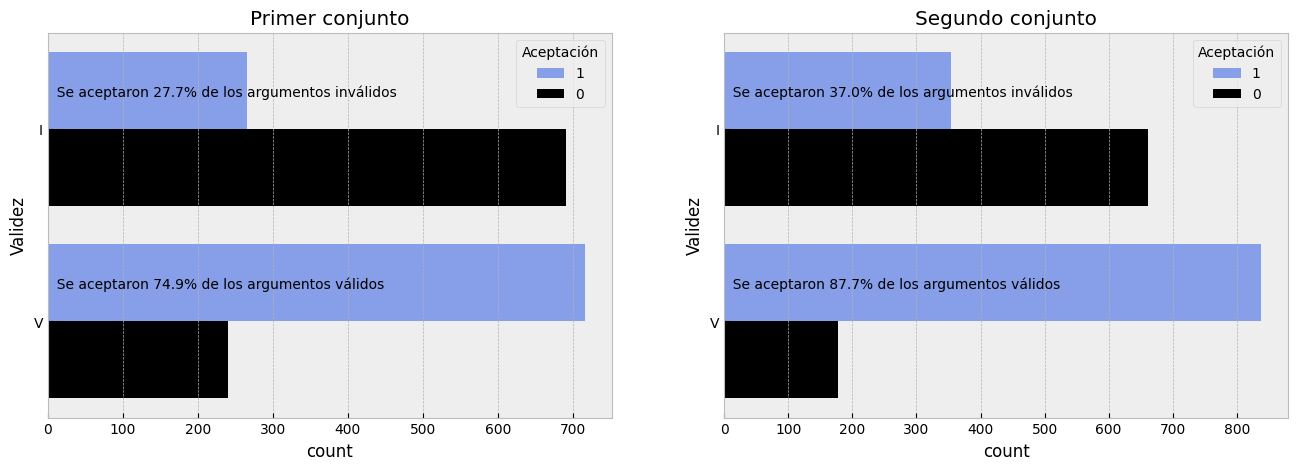

In [224]:
# conteo de frecuencia de aceptación de cada argumento con discriminación por validez
print("(a)")
print("Conteo de frecuencia de aceptación de los argumentos, discriminado por validez del argumento.")

sns.set_palette( ["#7795f8", "black"])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
sns.countplot(y= dfc_1.Validez,  hue=df_1.Aceptación, hue_order=(1,0), ax=ax1)
sns.countplot(y= dfc_2.Validez,  hue=df_2.Aceptación, hue_order=(1,0), ax=ax2)
ax1.text(0, -0.17, f"  Se aceptaron {(acep_iV_1)*100:.1f}% de los argumentos inválidos")
ax1.text(0, 0.83, f"  Se aceptaron {(acep_V_1)*100:.1f}% de los argumentos válidos")
ax2.text(0, -0.17, f"  Se aceptaron {(acep_iV_2)*100:.1f}% de los argumentos inválidos")
ax2.text(0, 0.83, f"  Se aceptaron {(acep_V_2)*100:.1f}% de los argumentos válidos")
ax1.set_title("Primer conjunto")
ax2.set_title("Segundo conjunto")
sns.move_legend(ax1, 'upper right')
sns.move_legend(ax2, 'upper right')

In [225]:
acept_incre_1= dfc_1.groupby('Creencia')['Aceptación'].value_counts()["I"].sum()
acep_iC_1= dfc_1.groupby('Creencia')['Aceptación'].value_counts()["I"][1]/acept_incre_1

acept_cre_1= dfc_1.groupby('Creencia')['Aceptación'].value_counts()["C"].sum()
acep_C_1= dfc_1.groupby('Creencia')['Aceptación'].value_counts()["C"][1]/acept_cre_1

acept_icre_2= dfc_2.groupby('Creencia')['Aceptación'].value_counts()["I"].sum()
acep_iC_2= dfc_2.groupby('Creencia')['Aceptación'].value_counts()["I"][1]/acept_icre_2

acept_cre_2= dfc_2.groupby('Creencia')['Aceptación'].value_counts()["C"].sum()
acep_C_2= dfc_2.groupby('Creencia')['Aceptación'].value_counts()["C"][1]/acept_cre_2

(b)
Conteo de frecuencia de aceptación de los argumentos, discriminado por creencia del argumento.


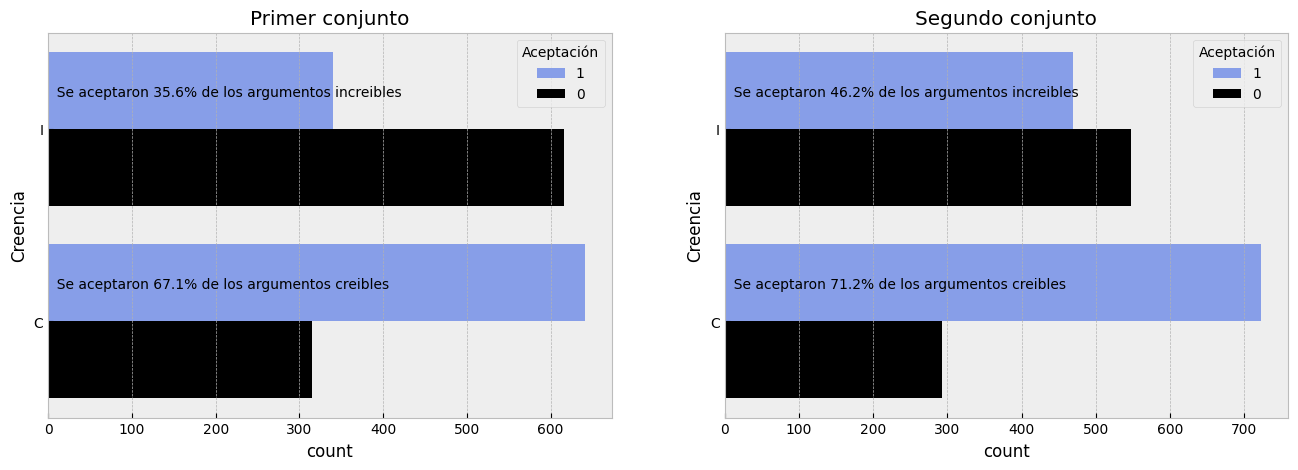

In [226]:
# El conteo de frecuencia de aceptación de cada uno de los argumentos con discriminación por creencia del argumento.
print("(b)")
print("Conteo de frecuencia de aceptación de los argumentos, discriminado por creencia del argumento.")

sns.set_palette( ["#7795f8", "black"])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
sns.countplot(y= dfc_1.Creencia,  hue=df_1.Aceptación, hue_order=(1,0), ax=ax1)
sns.countplot(y= dfc_2.Creencia,  hue=df_2.Aceptación, hue_order=(1,0), ax=ax2)
ax1.text(0, -0.17, f"  Se aceptaron {(acep_iC_1)*100:.1f}% de los argumentos increibles")
ax1.text(0, 0.83, f"  Se aceptaron {(acep_C_1)*100:.1f}% de los argumentos creibles")
ax2.text(0, -0.17, f"  Se aceptaron {(acep_iC_2)*100:.1f}% de los argumentos increibles")
ax2.text(0, 0.83, f"  Se aceptaron {(acep_C_2)*100:.1f}% de los argumentos creibles")
ax1.set_title("Primer conjunto")
ax2.set_title("Segundo conjunto")
sns.move_legend(ax1, 'upper right')
sns.move_legend(ax2, 'upper right')

In [227]:
grup_1= dfc_1.groupby('Modalidad')['Correctas'].value_counts()["Resolución Grupal"].sum()
correc_grup_1= dfc_1.groupby('Modalidad')['Correctas'].value_counts()["Resolución Grupal"][1]/grup_1

ind_1= dfc_1.groupby('Modalidad')['Correctas'].value_counts()["Resolución Individual"].sum()
correc_ind_1= dfc_1.groupby('Modalidad')['Correctas'].value_counts()["Resolución Individual"][1]/ind_1

grup_2= dfc_2.groupby('Modalidad')['Correctas'].value_counts()["Resolución Grupal"].sum()
correc_grup_2= dfc_2.groupby('Modalidad')['Correctas'].value_counts()["Resolución Grupal"][1]/grup_2

indpre_2= dfc_2.groupby('Modalidad')['Correctas'].value_counts()["Resolución Individual Pre"].sum()
correc_indpre_2= dfc_2.groupby('Modalidad')['Correctas'].value_counts()["Resolución Individual Pre"][1]/indpre_2

indpos_2= dfc_2.groupby('Modalidad')['Correctas'].value_counts()["Resolución Individual Post"].sum()
correc_indpos_2= dfc_2.groupby('Modalidad')['Correctas'].value_counts()["Resolución Individual Post"][1]/indpos_2

(c)
Conteo de frecuencia de respuestas correctas discriminado por modalidad de resolución.


/tmp/ipython-input-1927620912.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(["Individual","Grupal"], rotation=90)
/tmp/ipython-input-1927620912.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(["Individual Post", "Grupal", "Individual Pre"], rotation=90)


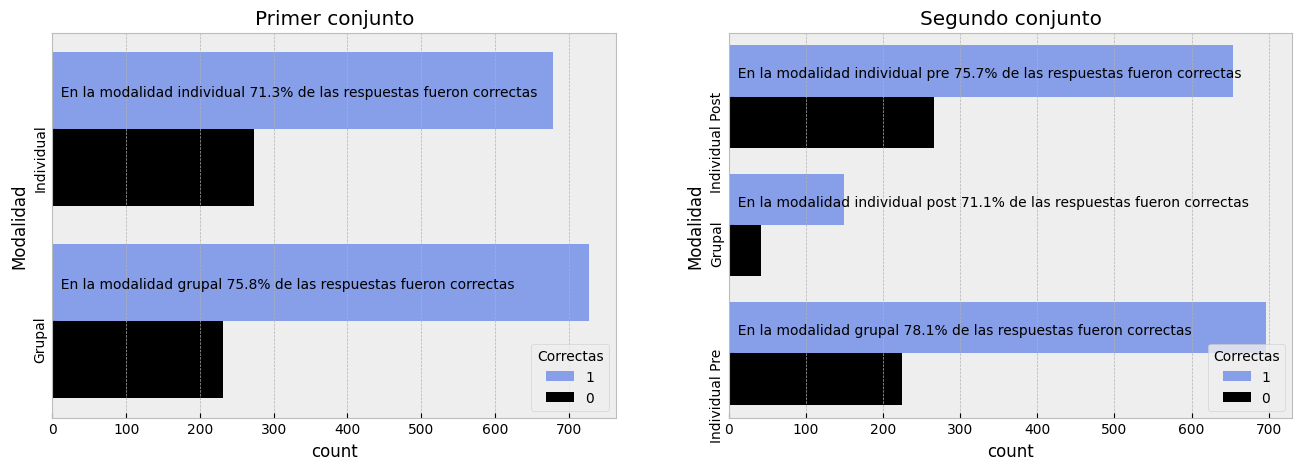

In [228]:
# El conteo de frecuencia de respuestas correctas para cada uno de los argumentos con discriminación por modalidad de resolución
print("(c)")
print("Conteo de frecuencia de respuestas correctas discriminado por modalidad de resolución.")
plt.style.use('bmh')
sns.set_palette( ["#7795f8", "black"])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
sns.countplot(y= dfc_1.Modalidad,  hue=df_1.Correctas, hue_order=(1,0), order= ["Resolución Individual","Resolución Grupal" ], ax=ax1)
sns.countplot(y= dfc_2.Modalidad,  hue=df_2.Correctas, hue_order=(1,0), order= ["Resolución Individual Pre","Resolución Grupal", "Resolución Individual Post"], ax=ax2)
ax1.text(0, 0.83, f"  En la modalidad grupal {(correc_grup_1)*100:.1f}% de las respuestas fueron correctas") # Encontrar la forma de que quede mas arriba
ax1.text(0, -0.17, f"  En la modalidad individual {(correc_ind_1)*100:.1f}% de las respuestas fueron correctas")
ax2.text(0, -0.15, f"  En la modalidad individual pre {(correc_indpos_2)*100:.1f}% de las respuestas fueron correctas")
ax2.text(0, 0.85, f"  En la modalidad individual post {(correc_indpre_2)*100:.1f}% de las respuestas fueron correctas")
ax2.text(0, 1.85, f"  En la modalidad grupal {(correc_grup_2)*100:.1f}% de las respuestas fueron correctas")
ax1.set_title("Primer conjunto")
ax2.set_title("Segundo conjunto")
ax1.set_yticklabels(["Individual","Grupal"], rotation=90)
ax2.set_yticklabels(["Individual Post", "Grupal", "Individual Pre"], rotation=90)
sns.move_legend(ax1, 'lower right')
sns.move_legend(ax2, 'lower right')

## 3. Relaciones entre variables

Podemos expresar los objetivos mencionados anteriormente en términos de determinar si hay una correlación entre las siguientes variables:

- Validez y creencia del argumento, y su aceptación.
- Modalidad de resolución y respuesta correcta.

En otras palabras, queremos investigar si hay una relación entre la validez y la creencia del argumento y si esto influye en su aceptación. Además, también nos interesa explorar si la forma en que se resuelve un problema afecta la probabilidad de obtener una respuesta correcta.

#### 3.1. Elija uno (o ambos) de los problemas mencionados arriba e indique ¿Qué tecnicas pueden utilizarse para determinar la existencia o no de correlación?¿Qué variables de nuestros conjuntos de datos entrarían en juego?

<font color='#99b0fa'> Como todas las variables son categóricas, y ya se
trabajó con los histogramas de frecuencia, se puede comenzar analizando la existencia o no de relación con tablas de contingencia.
Se quiere analizar si las siguientes variables tienen o no una correlación estadística. En primer medida, para analizar esta correlación, tendremos en cuenta las variables de validez y creencia versus aceptación.
Como se observaron tendencias similares entre las dos bases de datos se trabaja unicamente con la segunda.

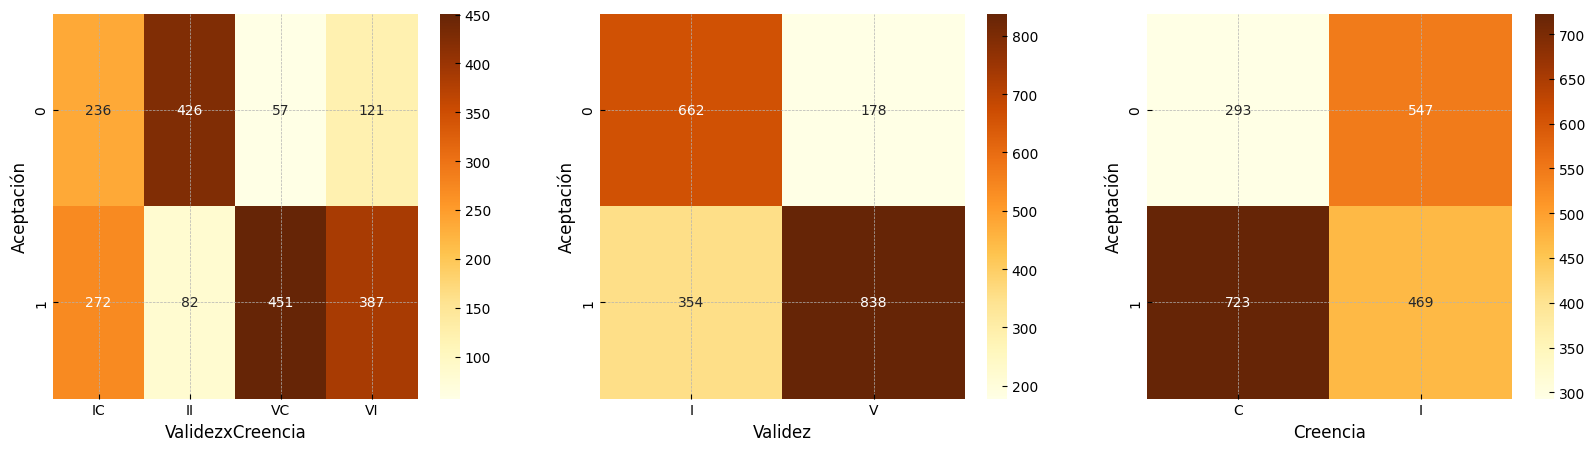

In [229]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
#plt.style.use('seaborn')

exp = pd.crosstab(df_2.Aceptación, df_2.ValidezxCreencia)
sns.heatmap(exp, annot=True, fmt='g', ax=ax1, cmap='YlOrBr')

exp = pd.crosstab(df_2.Aceptación, df_2.Validez)
sns.heatmap(exp, annot=True, fmt='g', ax=ax2, cmap='YlOrBr')

exp = pd.crosstab(df_2.Aceptación, df_2.Creencia)
sns.heatmap(exp, annot=True, fmt='g', ax=ax3, edgecolor='white', cmap='YlOrBr')

plt.show()

In [230]:
pd.crosstab(df_2['Aceptación'], df_2['ValidezxCreencia'], margins=True, margins_name='Total', normalize=True)

ValidezxCreencia,IC,II,VC,VI,Total
Aceptación,,,,,
0,0.116142,0.209646,0.028051,0.059547,0.413386
1,0.133858,0.040354,0.221949,0.190453,0.586614
Total,0.250000,0.250000,0.250000,0.250000,1.000000


In [231]:
pd.crosstab(df_2['Aceptación'], df_2['Validez'], margins=True, normalize=True, margins_name='Total')

Validez,I,V,Total
Aceptación,,,
0,0.325787,0.087598,0.413386
1,0.174213,0.412402,0.586614
Total,0.500000,0.500000,1.000000


In [232]:
pd.crosstab(df_2['Aceptación'], df_2['Creencia'], margins=True, margins_name='Total', normalize=True)

Creencia,C,I,Total
Aceptación,,,
0,0.144193,0.269193,0.413386
1,0.355807,0.230807,0.586614
Total,0.500000,0.500000,1.000000


<font color='#99b0fa'> La primera tabla detalla las proporciones de respuestas aceptadas o no aceptadas según su validez y credibilidad. Se puede observar que se realizaron exactamente un cuarto de preguntas validas creibles, validas increibles, invalidas creibles e invalidas increibles. Si la proporción de respuestas correctas e incorrectas fuera similar en todas las categorías, entonces no habría relación. Pero como hay discrepancias, más o menos marcadas según la categoría, entonces las variables están relacionadas. Por ejemplo, en la categoría VC, es decir, válido y creíble, hay una clara tendencia a que estos enunciados sean aceptados, de igual forma que ocurre con los que conforman los II, que tienen tendencia a no ser aceptados. Finalmente, si se observa los casos que podemos considerar "equivocados", es decir, aceptar una propuesta increible o invalida, y rechazar una propuesta creible o valida, en ambos casos darían aproximadamente el mismo margen de error, 37.49 para las de creencia y 26.17 para las de validez. Una pequeña diferencia a favor de la validez, pero cercanas.






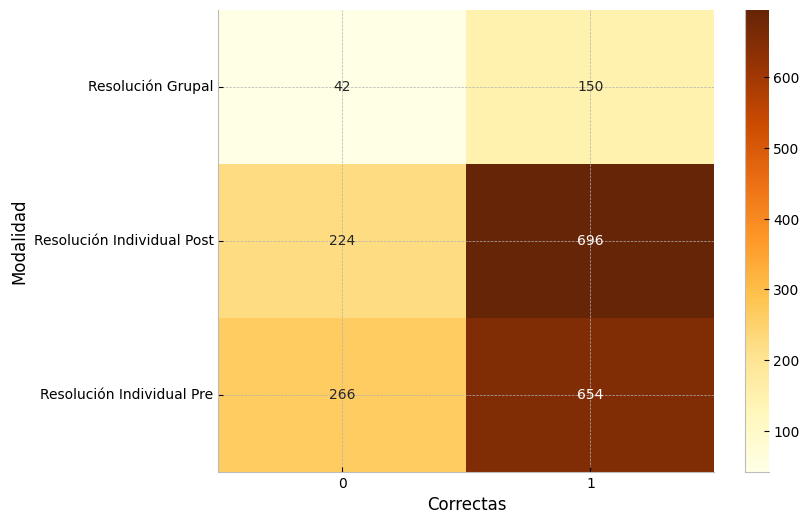

In [233]:
fig, (ax1) = plt.subplots(1, figsize=(8,6))
#plt.style.use('seaborn')

exp = pd.crosstab(df_2.Modalidad, df_2.Correctas)
sns.heatmap(exp, annot=True, fmt='g', ax=ax1, cmap='YlOrBr')
sns.despine()

In [234]:
pd.crosstab(df_2['Modalidad'], df_2['Correctas'], margins=True, margins_name='Total', normalize='index')

Correctas,0,1
Modalidad,,
Resolución Grupal,0.218750,0.781250
Resolución Individual Post,0.243478,0.756522
Resolución Individual Pre,0.289130,0.710870
Total,0.261811,0.738189


<font color='#99b0fa'> Aplicando el mismo método y criterio anterior, se observa que entre la resolución individual previa y la resolución grupal hay un claro aumento en la cantidad de respuestas correctas. Incluso si se considera la resolución individual posterior, en comparación a la previa, también aumenta el porcentaje de respuestas correctas. Si bien la diferencia no es tan grande, de alrededor de un 7% y 4.5% respectivamente, dado que en ambos casos se ve ese aumento, podriamos decir que efectivamente hay una correlación entre la modalidad de resolución con la cantidad de respuestas correctas. Principalmente, se podría decir, sin arriesgar los motivos, que la resolución grupal influenció lo suficiente para aumentar la cantidad de respuestas correctas, incluso luego cuando lo resolvieron individualmente. Por todo esto, cabe aclarar que habría una correlación entre estas variables entonces.

#### 3.1. Diseñe y lleve a cabo un test de hipótesis

In [235]:
from  scipy.stats import chi2_contingency

<font color='#99b0fa'> El test χ2 de independencia de Pearson se emplea para estudiar si existe asociación entre dos variables categóricas, es decir, si las proporciones de una variable son diferentes dependiendo del valor que adquiera la otra variable. Por esto, lo que se probara es si las variables son dependientes o independientes.

> Hipótesis

H0: La aceptación y la ValidezxCreencia son independientes, el porcentaje de aceptación no varía entre las distintas categorias de VxC.

Ha: La aceptación y la VxC son dependientes, el porcentaje de aceptación si varía entre las distintas categorias de VxC.

In [236]:
datos=pd.crosstab(df_2['Aceptación'], df_2['ValidezxCreencia'], margins=False).values
datos

array([[236, 426,  57, 121],
       [272,  82, 451, 387]])

In [237]:
test_result = chi2_contingency(datos)
test_result


Chi2ContingencyResult(statistic=np.float64(638.5473953339725), pvalue=np.float64(4.430064557277555e-138), dof=3, expected_freq=array([[210., 210., 210., 210.],
       [298., 298., 298., 298.]]))

In [238]:
alpha = 0.05
if test_result.pvalue < alpha:
    print("Se rechaza la hipótesis nula:  la aceptación y la VxC son dependientes, el % de aceptación si varía entre las distintos categorias de VxC.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente para concluir que el % de aceptación no varía entre las distintos categorias de VxC.")

Se rechaza la hipótesis nula:  la aceptación y la VxC son dependientes, el % de aceptación si varía entre las distintos categorias de VxC.


<font color='#99b0fa'> Se realiza nuevamente el mismo método anterior para analizar la modalidad de respuesta en relación con la cantidad de respuestas correctas. Para esto, se plantea las siguiente hipótesis.

> Hipótesis

H0: La modalidad de resolución y la cantidad de respuestas correctas son independientes, la modalidad no influye en la cantidad de respuestas correctas.

Ha: La modalidad de resolución y la cantidad de respuestas correctas son dependientes, la modalidad sí influye en la cantidad de respuestas correctas.

In [239]:
datos=pd.crosstab(df_2['Modalidad'], df_2['Correctas'], margins=False).values
datos

array([[ 42, 150],
       [224, 696],
       [266, 654]])

In [240]:
test_result = chi2_contingency(datos)
test_result

Chi2ContingencyResult(statistic=np.float64(6.994822883295194), pvalue=np.float64(0.030275652369561316), dof=2, expected_freq=array([[ 50.26771654, 141.73228346],
       [240.86614173, 679.13385827],
       [240.86614173, 679.13385827]]))

In [241]:
alpha = 0.05
if test_result.pvalue < alpha:
    print("Se rechaza la hipótesis nula:  la aceptación y la VxC son dependientes, el % de aceptación si varía entre las distintos categorias de VxC.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente para concluir que el % de aceptación no varía entre las distintos categorias de VxC.")

Se rechaza la hipótesis nula:  la aceptación y la VxC son dependientes, el % de aceptación si varía entre las distintos categorias de VxC.


#### 3.2. De acuerdo a la opción seleccionada y las tareas realizadas, **¿Puede afirmar que existe una correlación entre las variables consideradas?¿Por qué?**







<font color='#99b0fa'> En los puntos anteriores se analizaron la correlación desde la parte gráfica primero, analizando las tablas, y luego utilizando una prueba de independencia de Pearson. Se buscaba establecer la correlación, en el siguiente orden, entre:

*   Validez y creencia del argumento, y su aceptación.
*   Modalidad de resolución y respuesta correcta.

<font color='#99b0fa'> En base a lo analizado anteriormente, tanto desde las tablas como desde la parte analítica, se puede concluir que existe una fuerte correlación entre estas variables, es decir, se puede observar una dependencia entre ellas. El nivel de aceptación y la cantidad de respuestas correctas cambian según la validez o credibilidad del argumento y la modalidad de resolución del problema, respectivamente.


## 4. Comunicando resultados

Realice un informe en un archivo [markdown](https://www.markdownguide.org/getting-started/) de lo realizado a lo largo de esta actividad práctica, que incluya:

- Aspectos de interés del conjunto de datos: de dónde proviene, qué preguntas/problemas intenta resolver

- Mención de dificultades encontradas y cómo la sortearon

- Gráfica/s que consideran más saliente/s

- Decisiones que tomaron (por ejemplo, en qué variables se enfocaron y cuáles dejaron de lado)

- Resultados obtenidos

- Preguntas que se les plantearon a partir de los resultados y opciones de profundización

Les dejo [aquí](https://gist.github.com/cuonggt/9b7d08a597b167299f0d) una guía para el uso de archivos Markdown

# <font color='#99b0fa'> <center> **RESULTADOS**
---
En este primer trabajo nos enfocamos a familiarizarnos con los datos y entender cuáles eran las relaciones y los puntos más relevantes.


---


## Conjuntos de datos


Los datos se conforman por dos conjuntos que se recopilaron bajo la temática "*La influencia del conocimiento previo y sus efectos en el razonamiento lógico*". Un total de 354 participantes (239 del primer conjunto y 115 del segundo) realizaron tareas en diferentes modalidades y se registraron los resultados.
Ambos conjuntos están formados por las mismas columnas:
1. 'num': número de observación  (1 a 1912 en el primer dataset, 1913 a 3944 en el segundo ).
2. 'Participante': número identificador de cada participante.
3. 'Lugar_admin': ubicación donde se llevó a cabo la tarea
4. 'Modalidad': forma en que se realizó la tarea, en el primer conjunto puede ser individual o grupal y en el segundo puede ser individual pre, grupal o individual post.
5. 'Edad', 'Género': información particular del participante.
6. 'Grupo': número que identifica al grupo que pertenece el participante
7. 'Validez': define si el argumento de la tarea es valido o inválido.
8. 'Creencia': define si el argumento de la tarea es creible o increible.
9. 'ValidezxCreencia': combinación de las dos columnas previas.
10. 'Silogismo': número que identifica a cada argumento de la tarea
11. 'Aceptación': aceptación del argumento por parte del participante.
12. 'Correctas': coincidencia entre la aceptación o respuesta y la validez del argumento

>**Con esta información se busca detectar y predecir la aparición de los sesgos de creencia en pruebas de razonamiento, analizando la incidencia de diferentes variables en la aparición o mitigación de estos sesgos.**


## Dificultades

*   Una de las primeras dificultades de estos datos es que no  todos los participantes realizaron todas las modalidades de desarrollo de la tarea, por ejemplo en el primer set todos tienen 16 respuestas en modalidad individual pero menos de un cuarto de estos tiene las 8 respuestas correspondientes a la modalidad grupal
*   Otra complicación puede ser que no se completaron todas las celdas correspondientes a Género y Edad pero tampoco se dejó como una celda vacía, así que a primera vista no se reporta ningún valor como NaN.

## Gráficas relevantes:

En un primer análisis de las respuestas se pueden ver algunas tendencias respecto a la validez y credibilidad con la aceptación y la modalidad con el acierto o no de la respuesta.


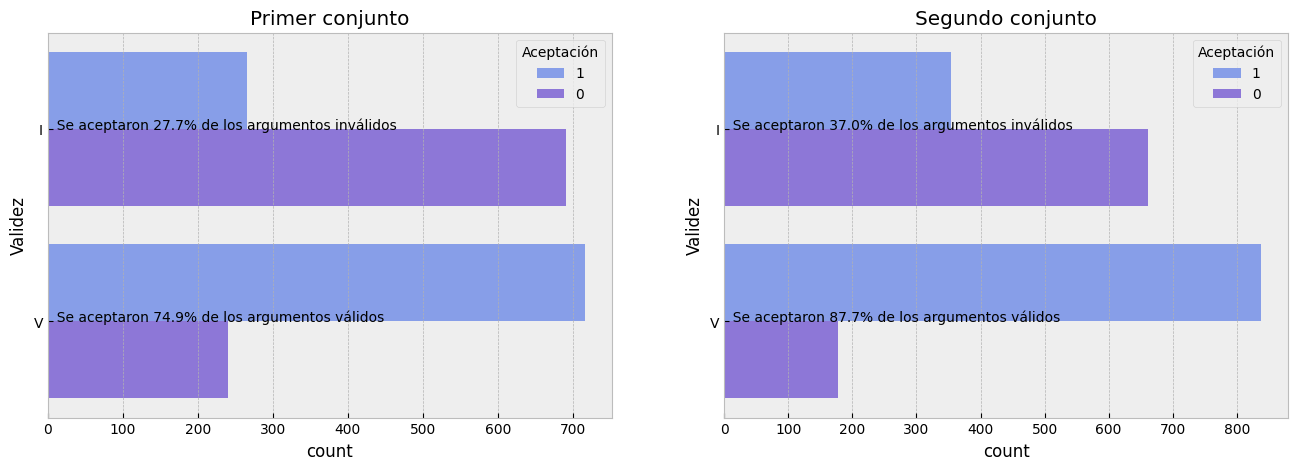

---

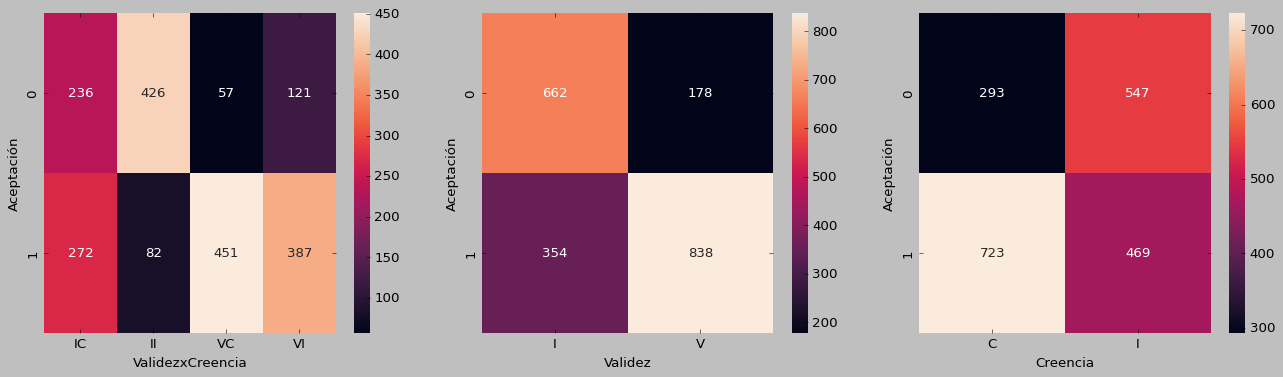

---

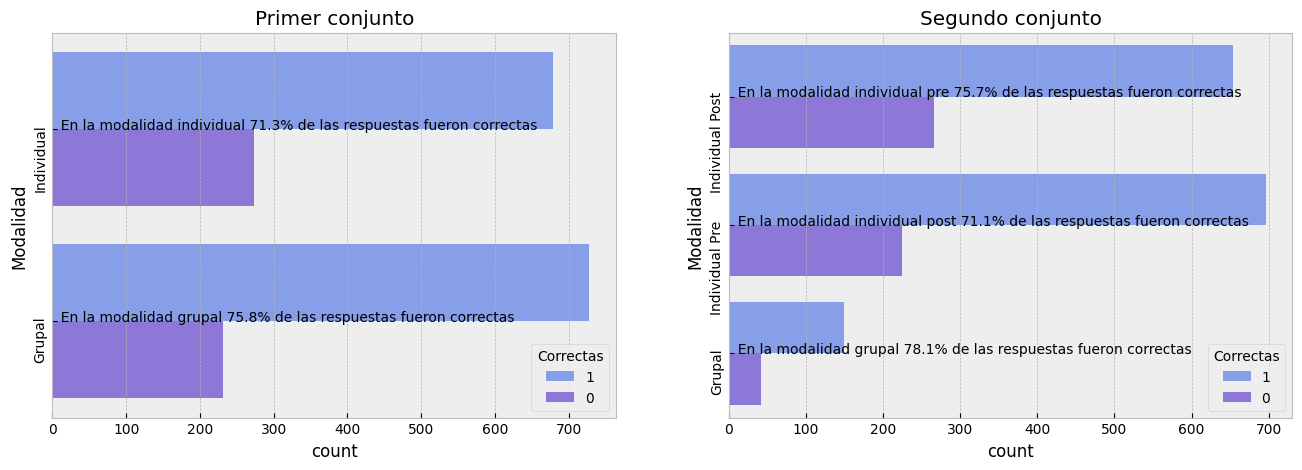

---

## Resultados

<font color='#99b0fa'> Principalmente en este trabajo se consiguió confirma que existe correlación entre las variables que caracterizan a las tareas, como son su validez, credibilidad y modalidad de desarrollo, con respecto a las respuestas de los participantes, es decir, su aceptación y correcta resolución. También cabe mencionar que se observaron tendencias similares en los dos conjuntos de datos, información importante para realizar los siguientes análisis.

## Profundizar

>Para futuros trabajos se puede hacer más foco en las variables género y edad que, como se vio en el análisis, requieren de cierto procesamiento para poder ser utilizadas.

